# Box-Cox transformation




In [1]:
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# drop lat and lon
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [3]:
# Plot histogram and Q-Q plots to explore the variable distribution


def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

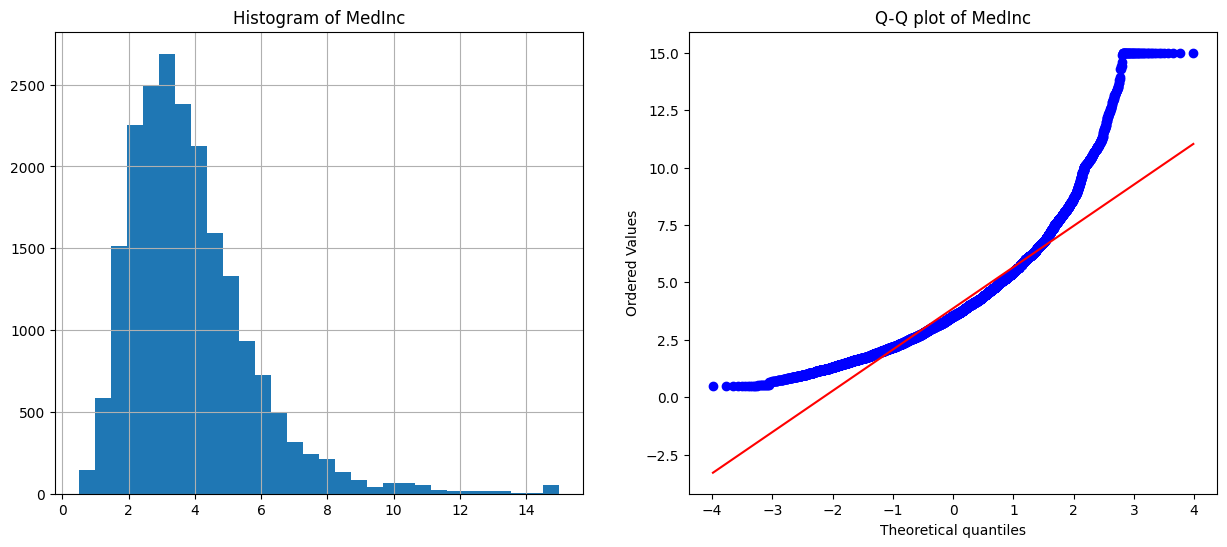

In [4]:
# check original distribution (not included in this recipe of book)

diagnostic_plots(X, "MedInc")

# Box-Cox transformation with SciPy

One variable at a time.

In [5]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

In [ ]:
# apply the Box-Cox transformation to variable MedInc
X_tf["MedInc"], param = stats.boxcox(X["MedInc"]) #returns Lambda & and the transformation (X_tf)

# print the optimal lambda found for MedInc
print("Optimal λ: ", param) # we got this for the MedInc column

Optimal λ:  0.09085445967082985


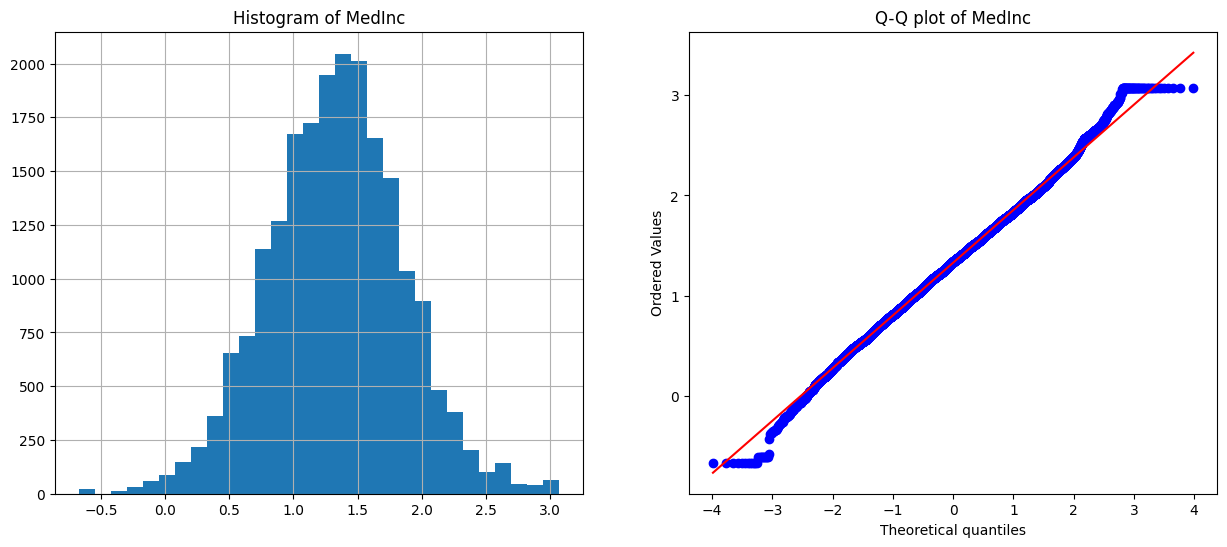

In [ ]:
# check original distribution (not included in this recipe of book)

diagnostic_plots(X_tf, "MedInc") #check the transformation now (X_tf)